In [1]:
##% LIBRARY IMPORT
import xarray as xr
import numpy as np
import scipy as sc
import sklearn as skl
import skimage as ski
from scipy.linalg import norm
from scipy.spatial.distance import euclidean, jensenshannon, correlation
from scipy.stats import wasserstein_distance, ecdf
import skgstat as skg
import pysteps
from pysteps.verification.spatialscores import fss, intensity_scale
from pysteps.verification.salscores import sal
from pysteps.verification.detcontscores import det_cont_fct
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import argparse as ap
print('modules loaded')
##%

mm=0
event_ID=0
print('settings loaded')
##% REGION SELECTION
if event_ID==0:
    ###USA
    year=2020; month=np.arange(3,10); 
    latslice=slice(20,50); lonslice=slice(250,300)
    lon_conv=False
    flag='USA'
elif event_ID==1:
    ###ARGENTINA
    year=2020; month=(9,10,11,12,1,2)
    latslice=slice(-40,-25); lonslice=slice(290,310)
    lon_conv=False
    flag='ARG'
elif event_ID==2:
    ###AUSTRALIA
    year=2020; month=(9,10,11,12,1,2)
    latslice=slice(-35,-20); lonslice=slice(140,155)
    lon_conv=False
    flag='AUS'
elif event_ID==3:
    ###CHINA
    year=2020; month=np.arange(4,10)
    latslice=slice(20,35); lonslice=slice(100,120)
    lon_conv=False
    flag='CHN'
elif event_ID==4:
    ###EUROPE
    year=2020; month=np.arange(4,10)
    latslice=slice(35,55); lonslice=slice(-10,30)
    lon_conv=True
    flag='EUR'
##% SETTINGS
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020_'+flag+'/'
models=['graphcast_','graphcast-oper_','pangu_','pangu-oper_','ifs_','sfno_','sfno-oper_','graphcast-red']#'fcnv2_dawn','ifs']
labels=['graphcast','graphcast-oper','pangu','pangu-oper','ifs','sfno','sfno-oper','graphcast-red']
references=[flag+'_era5_convseason_2020.nc',flag+'_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
figpath='/users/mfeldman/figs/season/'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
c7='#808080' #grey
colors=[c1,c2,c4,c3,c6,c5,c5,c5]


Pysteps configuration file found at: /work/FAC/FGSE/IDYST/tbeucler/default/mfeldman/miniforge3/envs/wb/lib/python3.11/site-packages/pysteps/pystepsrc

modules loaded
settings loaded


In [9]:

##% EVALUATION
era_ref=xr.open_dataset(datapath+references[0]).sortby('latitude').fillna(0)
lsm = xr.open_dataset('/users/mfeldman/LSM.nc').sortby('lat').fillna(0).isel(time=0).squeeze()
lsm = lsm.rename({'lon': 'longitude','lat': 'latitude'})
era_ref.coords['longitude'] = (era_ref.coords['longitude'] + 180) % 360 - 180
era_ref = era_ref.sortby(lsm.longitude)
lsm = lsm.sel(longitude=era_ref.longitude.values,latitude = era_ref.latitude.values).LSM.values

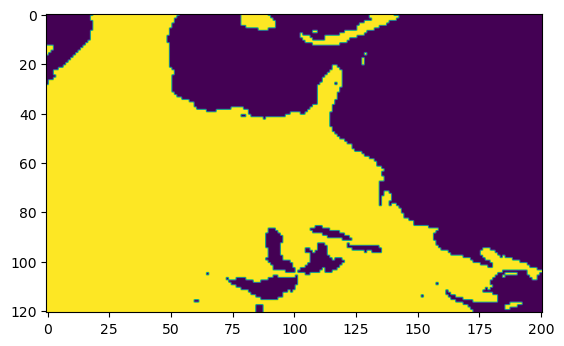

In [11]:
plt.imshow(lsm)

In [8]:
era_ref.longitude

<xarray.DataArray 'longitude' (longitude: 201)>
array([250.  , 250.25, 250.5 , ..., 299.5 , 299.75, 300.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 250.0 250.2 250.5 250.8 ... 299.5 299.8 300.0
Attributes:
    long_name:  longitude
    units:      degrees_east